In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
import torch
import os
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm

import numpy as np
from sklearn.mixture import GaussianMixture
# torch.manual_seed(1000)

In [97]:
datapath = os.path.join('../', 'data')
filterpath = os.path.join(datapath, '8_19')

def get_dataset():
  weight_dataset = []
  for f, file in tqdm(enumerate(os.listdir(filterpath))):
    filter = torch.load(os.path.join(filterpath, file), map_location=torch.device('cpu'))
    for i in range(8):
      weight_dataset.append(filter['0.weight'][i][0])
  return weight_dataset

num_images = len(os.listdir(filterpath))
dataset = get_dataset()
dataset = torch.stack(dataset, dim=0).view(-1,25)

X = dataset.detach().clone().numpy()

1364it [00:00, 3152.23it/s]


In [98]:
gmm = GaussianMixture(n_components=2).fit(X)
gmm.means_, gmm.weights_

(array([[-1.01404979, -1.42662513, -1.58260112, -1.52913069, -1.21275558,
         -1.40964882, -1.76646536, -1.85163685, -1.79746383, -1.47144188,
         -1.54907217, -1.84311961, -1.89620443, -1.83936473, -1.50453694,
         -1.47576968, -1.77687968, -1.82401893, -1.71947953, -1.30795335,
         -1.12626535, -1.42075028, -1.45746834, -1.27695727, -0.82085844],
        [ 0.64029076,  0.8676299 ,  0.95879535,  0.94290714,  0.81353428,
          0.8121442 ,  1.02088136,  1.07063249,  1.0461878 ,  0.90445488,
          0.90634656,  1.06603274,  1.09982922,  1.06483899,  0.90367858,
          0.91766923,  1.06390902,  1.08263256,  1.02816712,  0.8227588 ,
          0.83137814,  0.96382789,  0.97564578,  0.87948563,  0.6504938 ]]),
 array([0.45711177, 0.54288823]))

In [99]:
import matplotlib
import matplotlib.pyplot as plt

num_samples = 8
vmin, vmax = -2.5, 2.5
def visualise_filters(filters):
  num_rows = filters.shape[0]
  num_filters = filters.shape[1]
  _, axarr = plt.subplots(num_rows, num_filters, figsize=(int(5*(num_filters//8)), num_rows))
  plt.axis('off')
  for f in range(num_rows):
    filter = filters[f]
    for i in range(num_filters):
      if f < num_rows:
        axarr[f, i].set_axis_off()
        axarr[f, i].imshow(filter[i], interpolation=None, norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax, clip=False))
  plt.show()  
  return

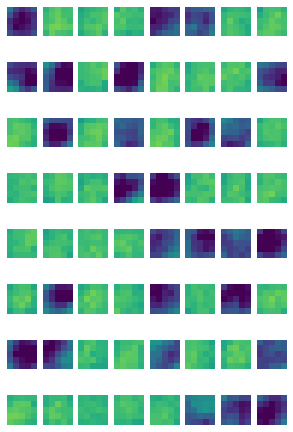

In [100]:
n_samples = 8
n_filters = 8
filters , _ = gmm.sample(n_filters*n_samples)
filters = np.random.permutation(np.reshape(filters, (-1,5,5)))
# print(components.sha)

filters = np.reshape(filters, (n_samples,n_filters,5,5))
visualise_filters(filters)
# components = np.reshape(components, (n_samples,n_filters,-1))